<div class="clearfix" style="padding: 10px; padding-left: 0px">
<a href="http://bombora.com"><img src="https://app.box.com/shared/static/e0j9v1xjmubit0inthhgv3llwnoansjp.png" width="200px" class="pull-right" style="display: inline-block; margin: 5px; vertical-align: middle;"></a>
<h1> Bombora Data Science: <br> *Interview Exam* </h1>
</div>

<img width="200px" src="https://app.box.com/shared/static/15slg1mvjd1zldbg3xkj9picjkmhzpa5.png">

---
# Welcome

Welcome! This notebook contains interview exam questions referenced in the *Instructions* section in the `README.md`—please read that first, *before* attempting to answer questions here.

<div class="alert alert-info" role="alert" style="margin: 10px">
<p style="font-weight:bold">ADVICE</p>
<p>*Do not* read these questions, and panic, *before* reading the instructions in `README.md`.</p>
</div>

<div class="alert alert-warning" role="alert" style="margin: 10px">
<p style="font-weight:bold">WARNING</p>

<p>If using <a href="https://try.jupyter.org">try.jupyter.org</a> do not rely on the server for anything you want to last - your server will be <span style="font-weight:bold">deleted after 10 minutes of inactivity</span>. Save often and rember download notebook when you step away (you can always re-upload and start again)!</p>
</div>


## Have fun!

Regardless of outcome, getting to know you is important. Give it your best shot and we'll look forward to following up!

# Exam Questions

## 1. Algo + Data Structures

### Q 1.1: Fibionacci
![fib image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/93/Fibonacci_spiral_34.svg/200px-Fibonacci_spiral_34.svg.png)

#### Q 1.1.1
Given $n$ where $n \in \mathbb{N}$ (i.e., $n$ is an integer and $n > 0$), write a function `fibonacci(n)` that computes the Fibonacci number $F_n$, where $F_n$ is defined by the recurrence relation:

$$ F_n = F_{n-1} + F_{n-2}$$

with initial conditions of:

$$ F_1 = 1,  F_2 = 1$$

In [1]:
memo = {}
def fibonacci(n):
    try:
        return(memo[n])
    except:
        if n == 0:
            fib = 0
        elif n == 1 or n == 2:
            fib = 1
        else:
            fib = fibonacci(n - 1) + fibonacci(n - 2)
        memo[n] = fib
        return(fib)

#### Q 1.1.2
What's the complexity of your implementation?

The time complexity is $O(n)$ since the recursive calls are evaluated only once and stored in memory for further use. The space complexity is $O(n)$ since $n$ values will be stored.

#### Q 1.1.3
Consider an alternative implementation to compute Fibonacci number $F_n$ and write a new function, `fibonacci2(n)`.

In [2]:
mat = [[1, 1], [1, 0]]
matmul = lambda x, y : [[x[0][0] * y[0][0] + x[0][1] * y[1][0], x[0][0] * y[0][1] + x[1][0] * y[1][1]],
                        [x[1][0] * y[0][0] + x[1][1] * y[1][0], x[1][0] * y[0][1] + x[1][1] * y[1][1]]]

def fibonacci2n(n):
    mat_memo = {}
    def matpower(mat, n):
        try:
            return(mat_memo[n])
        except:
            if n == 0:
                mat_memo[n] = 0
            elif n == 1:
                mat_memo[n] = mat
            elif n == 2:
                mat_memo[n] = matmul(mat, mat)
            else:
                ret = matmul(matpower(mat, n // 2), matpower(mat, n // 2))
                if n % 2:
                    mat_memo[n] = matmul(ret, mat)
                else:
                    mat_memo[n] = ret           
        return(mat_memo[n])
    
    fib = matpower(mat, n - 1)
    return(fib[0][0])

#### Q 1.1.4
What's the complexity of your implementation?

The time complexity is $O(\log n)$ since we are recursively computing the matrix powers and storing them (analogous to the first solution). In this case we start with $O(n)$ and by memoizing, we get a $O(\log n)$ solution.

In [3]:
memo = {}

In [4]:
%timeit -n 1 -r 1 fibonacci(1000)

13.5 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [5]:
%timeit -n 1 -r 1 fibonacci2n(1000)

305 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


#### Q 1.1.5
What are some examples of optimizations that could improve computational performance?

The space complexity of the first implementation can be improved further given that we only need the last two fibonacci numbers to compute the next one and there is no need to store all the solutions. The second implementation is optimal in terms of complexity but can be improved using vectorized implementations.

### Q 1.2: Linked List
![ll img](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Singly-linked-list.svg/500px-Singly-linked-list.svg.png)

#### Q 1.2.1
Consider a [singly linked list](https://en.wikipedia.org/wiki/Linked_list), $L$. Write a function `is_palindrome(L)` that detects if $L$ is a [palindrome](https://en.wikipedia.org/wiki/Palindrome), by returning a bool, `True` or `False`.


#### Q 1.2.2
What is the complexity of your implementation?

#### Q 1.2.3
Consider an alternative implementation to detect if L is a palindrome and write a new function, `is_palindrome2(L)`.

#### Q 1.2.4
What's the complexity of this implementation?


#### Q 1.2.5 
What are some examples of optimizations that could improve computational performance?


## 2. Prob + Stats

### Q 2.1: Finding $\pi$ in a random uniform?
![pi pie img](http://core2.staticworld.net/images/article/2016/03/pi-day-intro-100649273-carousel.idge.jpeg)

Given a uniform random generator $[0,1)$ (e.g., use your language's standard libary to generate random value), write a a function `compute_pi` to compute [$\pi$](https://en.wikipedia.org/wiki/Pi).

### Q 2.2: Making a 6-side die roll a 7?

![reno die image](http://thumbs.ebaystatic.com/images/g/IQ8AAOSwvzRXyagD/s-l225.jpg)

Using a single 6-side die, how can you generate a random number between 1 - 7?

We can roll a single 6-side die twice to obtain 36 possible values (which are uniformly random). Concretely, the possible values are 
$$(1,1), (1,2), ..., (1,6)\\ 
    (2,1), (2,2), ..., (2,6)\\
      \vdots \\ 
    (6,1), (6,2), ..., (6,6)$$
    
Renaming these values as 1, 2, 3,..., 36; we can map each of these values (except 36) uniquely to 1 - 7 by using (n - 1 modulo 7) + 1. Thus $1\rightarrow 1$, $7\rightarrow 7$, $8\rightarrow 1$ and so on. 

We roll the die twice and return the corresponding mapping. If we get 36, we reroll until we get a valid value.

In [6]:
import random
import seaborn as sns

In [7]:
rolls = {}
k = 1
for i in range(1, 7):
    for j in range(1, 7):
        rolls[(i, j)] = (k - 1) % 7 + 1
        k += 1

In [8]:
def draw7():
    roll1 = random.randint(1, 6)
    roll2 = random.randint(1, 6)
    if roll1 == 6 and roll2 == 6:
        return(draw7())
    else:
        return(rolls[(roll1, roll2)])

In [9]:
draws = [draw7() for i in range(100000)]
x = [i for i in range(1, 8)]
y = {i : 0 for i in x}
for i in draws:
    y[i] += 1

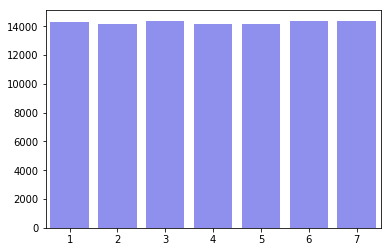

In [10]:
sns.barplot(x = list(y.keys()), y = list(y.values()), color = "blue", alpha = 0.5)

### Q 2.3: Is normality uniform?

![normal and uniform distributions](https://qph.ec.quoracdn.net/main-qimg-f6ed71ed1d0059760fb63db384dcbcca-c)

Given draws from a normal distribution with known parameters, how can you simulate draws from a uniform distribution?

### Q 2.4: Should you pay or should you go?

![coin flip](https://lh5.ggpht.com/iwD6MnHeHVAXNBgrO7r4N9MQxxYi6wT9vb0Mqu905zTnNlBciONAA98BqafyjzC06Q=w300)

Let’s say we play a game where I keep flipping a coin until I get heads. If the first time I get heads is on the nth coin, then I pay you $2^{(n-1)}$ US dollars. How much would you pay me to play this game? Explain.

### Q 2.5: Uber vs. Lyft

![uber vs lyft](http://usiaffinity.typepad.com/.a/6a01347fc1cb08970c01bb0876bcbe970d-pi)

You request 2 UberX’s and 3 Lyfts. If the time that each takes to reach you is IID, what is the probability that all the Lyfts arrive first? What is the probability that all the UberX’s arrive first?